In [1]:
parameter_file = '../parameters/params.yaml'
import yaml
import sys
import glob
import numpy as np
import os
import pandas as pd
from os.path import join
import seaborn as sns

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation_f=doc['annotation']
results = doc["results"]

os.chdir(results)
%load_ext autoreload
%autoreload 2

from tss.data import annotation
print('Number of tissues: ',len(tissues))

homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

params {'EMAIL': 'isshamie@ucsd.edu', 'parameters': 'parameters/params.yaml'}
/data2/resources/software/homer/v4.11_10242019/bin//
Number of tissues:  13
/data2/resources/software/homer/v4.11_10242019/bin//homer


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if sys.path[0] == '':


## Input

In [2]:
main_dir = "csRNA_pipeline/"

In [3]:
csRNA_dir = join(main_dir, 'csRNA_peaks')
samples_csRNA_dir = join(main_dir,"csRNA_peaks_samples")
merged_csRNA_dir =  join(main_dir,"csRNA_peaks_samples.merged")
merged_f = join(merged_csRNA_dir, 'csRNA_peaks.samples.merge')
anno_f = merged_f + '.anno'
seq_f = anno_f + '.fa'


In [4]:
tss_file = join("genome", "picr", "gcf", "start_site_mRNA.tsv")
cds_f = join("genome", "picr", "gcf", "CDS.bed")

In [5]:
anno_f = merged_f + ".anno"
peaks_with_distance_f = join(merged_csRNA_dir,'peaks_with_tss_distances.tsv')
peaks_expression_f = merged_f + '.peaksexpression'

peaks_with_distance_size1_f = peaks_with_distance_f.replace('.tsv',"")+ "_size1.tsv"
peaks_with_distance_size1_bed_f = peaks_with_distance_size1_f.replace('.tsv',".bed")
peaks_with_distance_size1_noCDS_bed_f =peaks_with_distance_size1_bed_f.replace('.bed',"noCDS.bed")


### Convert to peak expression

In [64]:
peaks_expression = annotation.convert_merged_vals_to_expression_matrix(merged_f, peak_folder=".", output_file=peaks_expression_f, orig_col="score" , is_orig_merged=False, is_csrna=True)
peaks_expression

Number of duplicate indices (having same index name, happens bc both +/- strand on exact same bp):  0.0
./csRNA_pipeline/csRNA_peaks/FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq2.tss.txt
./csRNA_pipeline/csRNA_peaks/Liver_START1_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq2.tss.txt
./csRNA_pipeline/csRNA_peaks/Spleen_START1_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Kidney_START2_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Muscle_START2_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/MiscOrgans_START2_STARTinput1_RNASeq1.tss.txt
./csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq2.tss.txt
./csRNA_pipeline/csRNA

,csRNA_pipeline/csRNA_peaks/FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Liver_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Spleen_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Kidney_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Muscle_START2_STARTinput1_RNASeq1.tss.txt,...,csRNA_pipeline/csRNA_peaks/Pancreas_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Pancreas_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Lung_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/MiscOrgans_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Lung_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput1_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput1_RNASeq1.tss.txt
0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,23.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.31,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,16.2,0.0,0.0,0.0,40.4,...,0.0,0.0,9.5,0.0,16.2,9.5,0.00,0.0,0.0,0.0
2,54.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.6,70.7,...,0.0,74.9,0.0,83.0,0.0,0.0,21.70,0.0,0.0,0.0
3,56.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.4,34.3,...,0.0,37.5,0.0,43.2,0.0,0.0,49.70,0.0,0.0,0.0
4,0.0,51.2,0.0,0.0,0.0,134.6,0.0,53.3,51.2,0.0,...,0.0,0.0,0.0,0.0,134.6,0.0,12.40,0.0,134.6,134.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223555,36.4,14.8,0.0,19.0,59.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,53.1,0.0,19.0,59.00,0.0,0.0,0.0
223556,23.1,27.6,0.0,0.0,0.0,0.0,0.0,0.0,27.6,40.4,...,0.0,0.0,19.0,43.2,0.0,19.0,40.40,0.0,0.0,0.0
223557,0.0,0.0,1098.1,0.0,0.0,65.0,67.6,278.5,0.0,16.2,...,190.3,343.5,22.2,0.0,65.0,22.2,0.00,0.0,0.0,0.0
223558,203.4,345.5,0.0,129.8,19.8,313.2,0.0,0.0,345.5,68.7,...,0.0,174.9,129.8,136.2,313.2,129.8,74.50,0.0,0.0,0.0


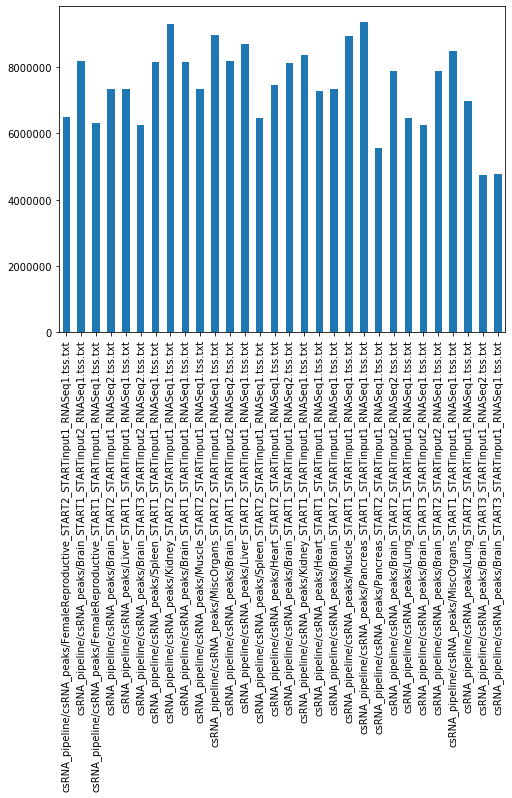

In [65]:
peaks_expression.sum().plot.bar()

In [66]:
annotation.combine_merge_with_anno(merged_f+'.minimal',anno_file=anno_f)

,Chr,Start,End,Strand,Stat,Annotation
ID,,,,,,
0,NW_020822658.1,10805314,10805530,+,16.220001,"intron (XM_027431627.1, intron 3 of 13)"
1,NW_020822425.1,14035260,14035497,-,22.128750,Intergenic
2,NW_020822535.1,9942842,9943013,-,69.230003,promoter-TSS (XM_027415505.1)
3,NW_020822421.1,1242707,1242899,-,48.510002,promoter-TSS (NM_001271426.1_1)
4,NW_020822618.1,2329149,2329299,-,80.889999,promoter-TSS (XM_027428333.1)
...,...,...,...,...,...,...
223555,NW_020822592.1,1062203,1062509,-,34.338463,Intergenic
223556,NW_020822663.1,1407503,1407776,-,29.473333,Intergenic
223557,NW_020822601.1,31966849,31967000,+,270.886658,"intron (XM_027421853.1, intron 12 of 18)"


### Distance to Genes

In [67]:
%%time

peaks_file = merged_f+'.minimal.anno'
peaks_with_dist = annotation.wrap_distance_to_landmarks(peaks_file, landmark_file=tss_file,
                          main_landmark = 'transcript_id',landmark_cols=['gene'],
                          output_f=peaks_with_distance_f,is_parallel=True,num_par=12)

CPU times: user 4.64 s, sys: 1.01 s, total: 5.65 s
Wall time: 1min 29s


In [68]:
peaks_with_dist

,Chr,Start,End,Strand,Stat,Annotation,Nearest TSS,Distance to TSS,isSameStrand,Nearest gene
ID,,,,,,,,,,
0,NW_020822658.1,10805314,10805530,+,16.220001,"intron (XM_027431627.1, intron 3 of 13)",XM_027431624.1,-19498.0,True,Mtss1
1,NW_020822425.1,14035260,14035497,-,22.128750,Intergenic,XM_027393959.1,144461.5,False,Spry2
2,NW_020822535.1,9942842,9943013,-,69.230003,promoter-TSS (XM_027415505.1),XM_027415505.1,-29.5,True,Zdhhc3
3,NW_020822421.1,1242707,1242899,-,48.510002,promoter-TSS (NM_001271426.1_1),NM_001271426.1,-118.0,False,Orc5
4,NW_020822618.1,2329149,2329299,-,80.889999,promoter-TSS (XM_027428333.1),XM_027428333.1,-58.0,True,Kcna6
...,...,...,...,...,...,...,...,...,...,...
223555,NW_020822592.1,1062203,1062509,-,34.338463,Intergenic,XM_027419735.1,20360.0,False,Arl4a
223556,NW_020822663.1,1407503,1407776,-,29.473333,Intergenic,XM_027431723.1,36601.5,True,Nlgn3
223557,NW_020822601.1,31966849,31967000,+,270.886658,"intron (XM_027421853.1, intron 12 of 18)",XM_027421857.1,-133026.5,False,Bcl2l11


## Log expression

In [69]:
peaks_df = pd.read_csv(peaks_expression_f,sep="\t",index_col=0)
peaks_df.head()

,csRNA_pipeline/csRNA_peaks/FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Liver_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Spleen_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Kidney_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Muscle_START2_STARTinput1_RNASeq1.tss.txt,...,csRNA_pipeline/csRNA_peaks/Pancreas_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Pancreas_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Lung_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/MiscOrgans_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Lung_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput1_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput1_RNASeq1.tss.txt
0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,23.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.31,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,16.2,0.0,0.0,0.0,40.4,...,0.0,0.0,9.5,0.0,16.2,9.5,0.00,0.0,0.0,0.0
2,54.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.6,70.7,...,0.0,74.9,0.0,83.0,0.0,0.0,21.70,0.0,0.0,0.0
3,56.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.4,34.3,...,0.0,37.5,0.0,43.2,0.0,0.0,49.70,0.0,0.0,0.0
4,0.0,51.2,0.0,0.0,0.0,134.6,0.0,53.3,51.2,0.0,...,0.0,0.0,0.0,0.0,134.6,0.0,12.40,0.0,134.6,134.6


In [70]:
peaks_df = np.log10(peaks_df+1)
peaks_df.to_csv(peaks_expression_f + '.log10',sep="\t")

In [71]:
peaks_df

,csRNA_pipeline/csRNA_peaks/FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Liver_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Spleen_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Kidney_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Muscle_START2_STARTinput1_RNASeq1.tss.txt,...,csRNA_pipeline/csRNA_peaks/Pancreas_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Pancreas_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Lung_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/MiscOrgans_START1_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Lung_START2_STARTinput1_RNASeq1.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput1_RNASeq2.tss.txt,csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput1_RNASeq1.tss.txt
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.401401,1.392697,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.013259,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.235528,0.000000,0.000000,0.000000,1.617000,...,0.000000,0.000000,1.021189,0.000000,1.235528,1.021189,0.000000,0.0,0.000000,0.000000
2,1.745075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.151063,1.855519,...,0.000000,1.880242,0.000000,1.924279,0.000000,0.000000,1.356026,0.0,0.000000,0.000000
3,1.757396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960946,1.547775,...,0.000000,1.585461,0.000000,1.645422,0.000000,0.000000,1.705008,0.0,0.000000,0.000000
4,0.000000,1.717671,0.000000,0.000000,0.000000,2.132260,0.000000,1.734800,1.717671,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.132260,0.000000,1.127105,0.0,2.132260,2.132260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223555,1.572872,1.198657,0.000000,1.301030,1.781755,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.301030,1.733197,0.000000,1.301030,1.778151,0.0,0.000000,0.000000
223556,1.382017,1.456366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.456366,1.617000,...,0.000000,0.000000,1.301030,1.645422,0.000000,1.301030,1.617000,0.0,0.000000,0.000000
223557,0.000000,0.000000,3.041037,0.000000,0.000000,1.819544,1.836324,2.446382,0.000000,1.235528,...,2.281715,2.537189,1.365488,0.000000,1.819544,1.365488,0.000000,0.0,0.000000,0.000000
223558,2.310481,2.539703,0.000000,2.116608,1.318063,2.497206,0.000000,0.000000,2.539703,1.843233,...,0.000000,2.245266,2.116608,2.137354,2.497206,2.116608,1.877947,0.0,0.000000,0.000000


## Make peak only on single base-pair, and then remove ones that overlap with CDSs

In [72]:
peaks_df = pd.read_csv(peaks_with_distance_f,sep="\t")
peaks_df["Start"] = (1.0*(peaks_df["End"] + peaks_df["Start"])/2).astype(int)
peaks_df["End"] = peaks_df["Start"] + 1
peaks_df.to_csv(peaks_with_distance_size1_f,sep="\t")

peaks_df.head()

,ID,Chr,Start,End,Strand,Stat,Annotation,Nearest TSS,Distance to TSS,isSameStrand,Nearest gene
0,0,NW_020822658.1,10805422,10805423,+,16.220001,"intron (XM_027431627.1, intron 3 of 13)",XM_027431624.1,-19498.0,True,Mtss1
1,1,NW_020822425.1,14035378,14035379,-,22.128750,Intergenic,XM_027393959.1,144461.5,False,Spry2
2,2,NW_020822535.1,9942927,9942928,-,69.230003,promoter-TSS (XM_027415505.1),XM_027415505.1,-29.5,True,Zdhhc3
3,3,NW_020822421.1,1242803,1242804,-,48.510002,promoter-TSS (NM_001271426.1_1),NM_001271426.1,-118.0,False,Orc5
4,4,NW_020822618.1,2329224,2329225,-,80.889999,promoter-TSS (XM_027428333.1),XM_027428333.1,-58.0,True,Kcna6


## Using bedtools intersect
-v	Only report those entries in A that have no overlap in B. Restricted by -f and -r.  
-s  Force “strandedness”. That is, only report hits in B that overlap A on the same strand. By default, overlaps are reported without respect to strand.  


In [73]:
%%time 
peak_bed = peaks_with_distance_size1_bed_f
peaks_df[["Chr","Start","End","ID", "Stat","Strand"]].to_csv(peak_bed,header=None,sep="\t",index=False)
out_f = peaks_with_distance_size1_noCDS_bed_f

cmd = "bedtools intersect -s -v -a {peak_bed} -b {cds}  > {out_f}".format(
    peak_bed=peak_bed, cds=cds_f, out_f = out_f )
print(cmd)
!{cmd}

bedtools intersect -s -v -a csRNA_pipeline/csRNA_peaks_samples.merged/peaks_with_tss_distances_size1.bed -b genome/picr/gcf/CDS.bed  > csRNA_pipeline/csRNA_peaks_samples.merged/peaks_with_tss_distances_size1noCDS.bed
CPU times: user 1.23 s, sys: 48.4 ms, total: 1.28 s
Wall time: 3.55 s


In [74]:
nocds =  pd.read_csv(out_f,sep="\t",header=None)
peaks_df[peaks_df["ID"].isin(nocds[3])].to_csv(out_f.replace(".bed",".tsv"),index=False,sep="\t")